In [0]:
import numpy as np
import pandas as pd
# Import PnL from Moneycontrol webpage
data = pd.read_html('https://www.moneycontrol.com/financials/tatamotors/results/yearly/TM03#TM03',header=0)[0]
data1 = pd.read_html('https://www.moneycontrol.com/financials/tatamotors/results/yearly/TM03/2#TM03',header=0)[0]
data2 = pd.read_html('https://www.moneycontrol.com/financials/tatamotors/results/yearly/TM03/3#TM03', header = 0)[0]

In [2]:
data.head()

,Yearly Results of Tata Motors (in Rs. Cr.),Mar '19,Mar '18,Mar '17,Mar '16,Mar '15,Unnamed: 6
0,Net Sales/Income from operations,68764.88,58831.41,44363.60,42845.47,35890.50,NaN
1,Other Operating Income,437.88,--,--,--,404.24,NaN
2,Total Income From Operations,69202.76,58831.41,44363.60,42845.47,36294.74,NaN
3,EXPENDITURE,NaN,NaN,NaN,NaN,NaN,NaN
4,Consumption of Raw Materials,43748.77,37080.45,27654.40,24997.40,22155.23,NaN


In [3]:
#checking the dimensions of Dataframe
print(data.shape, data1.shape, data2.shape)

(49, 7) (49, 7) (49, 7)


In [0]:
#combine the dataframes in one dataframe
data_tata = pd.concat([data,data1,data2],axis = 1)

In [5]:
data_tata.columns

Index(['Yearly Results of Tata Motors (in Rs. Cr.)', 'Mar '19', 'Mar '18',
       'Mar '17', 'Mar '16', 'Mar '15', 'Unnamed: 6',
       'Yearly Results of Tata Motors (in Rs. Cr.)', 'Mar '14', 'Mar '13',
       'Mar '12', 'Mar '11', 'Mar '10', 'Unnamed: 6',
       'Yearly Results of Tata Motors (in Rs. Cr.)', 'Mar '09', 'Mar '08',
       'Mar '07', 'Mar '06', 'Mar '05', 'Unnamed: 6'],
      dtype='object')

In [6]:
data_tata.iloc[:,0:11].head()

,Yearly Results of Tata Motors (in Rs. Cr.),Mar '19,Mar '18,Mar '17,Mar '16,Mar '15,Unnamed: 6,Yearly Results of Tata Motors (in Rs. Cr.),Mar '14,Mar '13,Mar '12
0,Net Sales/Income from operations,68764.88,58831.41,44363.60,42845.47,35890.50,NaN,Net Sales/Income from operations,33906.97,44373.04,54005.40
1,Other Operating Income,437.88,--,--,--,404.24,NaN,Other Operating Income,381.14,392.68,301.16
2,Total Income From Operations,69202.76,58831.41,44363.60,42845.47,36294.74,NaN,Total Income From Operations,34288.11,44765.72,54306.56
3,EXPENDITURE,NaN,NaN,NaN,NaN,NaN,NaN,EXPENDITURE,NaN,NaN,NaN
4,Consumption of Raw Materials,43748.77,37080.45,27654.40,24997.40,22155.23,NaN,Consumption of Raw Materials,20492.87,27244.28,33894.82


In [0]:
#setting the column with the Particulars as row index 
data_tata.index = data[data.columns[0]]

In [8]:
data_tata.iloc[:,0:11].head()

,Yearly Results of Tata Motors (in Rs. Cr.),Mar '19,Mar '18,Mar '17,Mar '16,Mar '15,Unnamed: 6,Yearly Results of Tata Motors (in Rs. Cr.),Mar '14,Mar '13,Mar '12
Yearly Results of Tata Motors (in Rs. Cr.),,,,,,,,,,,
Net Sales/Income from operations,Net Sales/Income from operations,68764.88,58831.41,44363.60,42845.47,35890.50,NaN,Net Sales/Income from operations,33906.97,44373.04,54005.40
Other Operating Income,Other Operating Income,437.88,--,--,--,404.24,NaN,Other Operating Income,381.14,392.68,301.16
Total Income From Operations,Total Income From Operations,69202.76,58831.41,44363.60,42845.47,36294.74,NaN,Total Income From Operations,34288.11,44765.72,54306.56
EXPENDITURE,EXPENDITURE,NaN,NaN,NaN,NaN,NaN,NaN,EXPENDITURE,NaN,NaN,NaN
Consumption of Raw Materials,Consumption of Raw Materials,43748.77,37080.45,27654.40,24997.40,22155.23,NaN,Consumption of Raw Materials,20492.87,27244.28,33894.82


In [0]:
data_tata = data_tata.drop(['Yearly Results of Tata Motors (in Rs. Cr.)', 'Unnamed: 6'], axis = 1)

In [10]:
print(data_tata.head())
print("shape of dataframe is " + str(data_tata.shape))
print("data types of columns is " + str(data_tata.dtypes))
print("missing value in data is " + str(data_tata.isnull().sum()))

                                             Mar '19  ...   Mar '05
Yearly Results of Tata Motors (in Rs. Cr.)            ...          
Net Sales/Income from operations            68764.88  ...  17419.13
Other Operating Income                        437.88  ...        --
Total Income From Operations                69202.76  ...  17419.13
EXPENDITURE                                      NaN  ...       NaN
Consumption of Raw Materials                43748.77  ...  11929.48

[5 rows x 15 columns]
shape of dataframe is (49, 15)
data types of columns is Mar '19    object
Mar '18    object
Mar '17    object
Mar '16    object
Mar '15    object
Mar '14    object
Mar '13    object
Mar '12    object
Mar '11    object
Mar '10    object
Mar '09    object
Mar '08    object
Mar '07    object
Mar '06    object
Mar '05    object
dtype: object
missing value in data is Mar '19    7
Mar '18    7
Mar '17    7
Mar '16    7
Mar '15    7
Mar '14    7
Mar '13    7
Mar '12    7
Mar '11    7
Mar '10    7
Mar '0

In [0]:
#replace the missing values with zeros
data_tata = data_tata.fillna(0)

In [12]:
data_tata.isnull().sum()

Mar '19    0
Mar '18    0
Mar '17    0
Mar '16    0
Mar '15    0
Mar '14    0
Mar '13    0
Mar '12    0
Mar '11    0
Mar '10    0
Mar '09    0
Mar '08    0
Mar '07    0
Mar '06    0
Mar '05    0
dtype: int64

In [13]:
data_tata.iloc[:,0:5].head()

,Mar '19,Mar '18,Mar '17,Mar '16,Mar '15
Yearly Results of Tata Motors (in Rs. Cr.),,,,,
Net Sales/Income from operations,68764.88,58831.41,44363.60,42845.47,35890.50
Other Operating Income,437.88,--,--,--,404.24
Total Income From Operations,69202.76,58831.41,44363.60,42845.47,36294.74
EXPENDITURE,0,0,0,0,0
Consumption of Raw Materials,43748.77,37080.45,27654.40,24997.40,22155.23


In [0]:
#replace the strings in the dataframe with zeros and convert the data into float type!
data_tata = data_tata.replace("--", 0)
for i in data_tata.columns:
  data_tata[i] = pd.to_numeric(data_tata[i])

In [15]:
data_tata.dtypes

Mar '19    float64
Mar '18    float64
Mar '17    float64
Mar '16    float64
Mar '15    float64
Mar '14    float64
Mar '13    float64
Mar '12    float64
Mar '11    float64
Mar '10    float64
Mar '09    float64
Mar '08    float64
Mar '07    float64
Mar '06    float64
Mar '05    float64
dtype: object

In [16]:
data_tata.iloc[:,0:5]

,Mar '19,Mar '18,Mar '17,Mar '16,Mar '15
Yearly Results of Tata Motors (in Rs. Cr.),,,,,
Net Sales/Income from operations,68764.88,58831.41,44363.60,42845.47,35890.50
Other Operating Income,437.88,0.00,0.00,0.00,404.24
Total Income From Operations,69202.76,58831.41,44363.60,42845.47,36294.74
EXPENDITURE,0.00,0.00,0.00,0.00,0.00
Consumption of Raw Materials,43748.77,37080.45,27654.40,24997.40,22155.23
Purchase of Traded Goods,6722.32,4762.41,3945.97,4101.97,5765.24
Increase/Decrease in Stocks,144.69,842.05,-251.43,10.05,-878.82
Power & Fuel,0.00,0.00,0.00,0.00,0.00
Employees Cost,4273.10,3966.73,3558.52,3188.97,3091.46


In [17]:
data_tata.isnull().sum()

Mar '19    0
Mar '18    0
Mar '17    0
Mar '16    0
Mar '15    0
Mar '14    0
Mar '13    0
Mar '12    0
Mar '11    0
Mar '10    0
Mar '09    0
Mar '08    0
Mar '07    0
Mar '06    0
Mar '05    0
dtype: int64

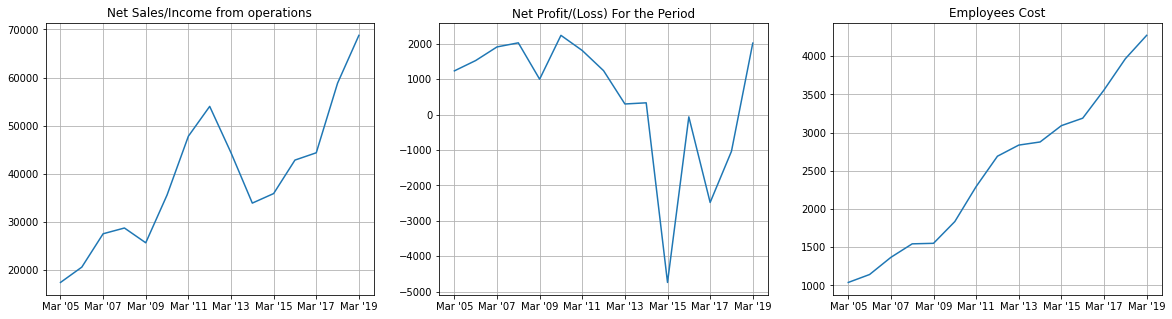

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize = (20,5))

plt.subplot(1,3,1)
plt.title("Net Sales/Income from operations")
data_tata.sort_index(axis=1, ascending=True).transpose()['Net Sales/Income from operations'].plot()
plt.grid()

plt.subplot(1,3,2)
plt.title('Net Profit/(Loss) For the Period')
data_tata.sort_index(axis=1, ascending=True).transpose()['Net Profit/(Loss) For the Period'].plot()
plt.grid()

plt.subplot(1,3,3)
plt.title("Employees Cost")
data_tata.sort_index(axis=1, ascending=True).transpose()['Employees Cost'].plot(sharex = True)
plt.grid()

plt.show()


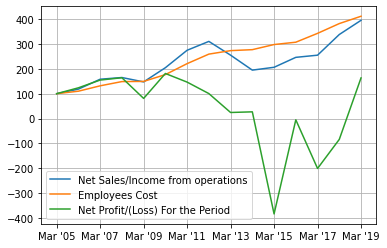

In [19]:
for i in ["Net Sales/Income from operations","Employees Cost","Net Profit/(Loss) For the Period"]:
  ((data_tata.sort_index(axis=1, ascending=True).transpose()[i])/(data_tata.sort_index(axis=1, ascending=True).transpose()[i]).iloc[0]*100).plot(kind = 'line')
plt.legend()
plt.grid()
plt.show()

In [20]:
data_tata.transpose().sum()

Yearly Results of Tata Motors (in Rs. Cr.)
Net Sales/Income from operations                                           586329.92
Other Operating Income                                                       2150.14
Total Income From Operations                                               588480.06
EXPENDITURE                                                                     0.00
Consumption of Raw Materials                                               365098.26
Purchase of Traded Goods                                                    50009.26
Increase/Decrease in Stocks                                                 -1962.10
Power & Fuel                                                                    0.00
Employees Cost                                                              37261.33
Depreciation                                                                25075.90
Excise Duty                                                                     0.00
Admin. And Selling Exp

In [0]:
yearly_change = data_tata.sort_index(axis=1, ascending=True).transpose().pct_change().T

In [22]:
print(yearly_change.head())
print(yearly_change.shape)

                                            Mar '05  ...   Mar '19
Yearly Results of Tata Motors (in Rs. Cr.)           ...          
Net Sales/Income from operations                NaN  ...  0.168846
Other Operating Income                          NaN  ...       inf
Total Income From Operations                    NaN  ...  0.176289
EXPENDITURE                                     NaN  ...       NaN
Consumption of Raw Materials                    NaN  ...  0.179834

[5 rows x 15 columns]
(49, 15)


In [23]:
yearly_change.head()

,Mar '05,Mar '06,Mar '07,Mar '08,Mar '09,Mar '10,Mar '11,Mar '12,Mar '13,Mar '14,Mar '15,Mar '16,Mar '17,Mar '18,Mar '19
Yearly Results of Tata Motors (in Rs. Cr.),,,,,,,,,,,,,,,
Net Sales/Income from operations,NaN,0.182734,0.336519,0.043420,-0.106855,0.387060,0.343167,0.129645,-0.178359,-0.235866,0.058499,0.193783,0.035433,0.326119,0.168846
Other Operating Income,NaN,NaN,NaN,NaN,NaN,NaN,inf,0.292310,0.303892,-0.029388,0.060608,-1.000000,NaN,NaN,inf
Total Income From Operations,NaN,0.182734,0.336519,0.043420,-0.106855,0.387060,0.349715,0.130434,-0.175685,-0.234054,0.058523,0.180487,0.035433,0.326119,0.176289
EXPENDITURE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Consumption of Raw Materials,NaN,0.195682,0.358323,-0.040405,-0.127660,0.257357,0.326877,0.252651,-0.196211,-0.247810,0.081119,0.128284,0.106291,0.340852,0.179834


In [24]:
pd.DataFrame([data_tata.transpose()['Net Sales/Income from operations'],yearly_change.transpose()['Net Sales/Income from operations']]).transpose().head()

,Net Sales/Income from operations,Net Sales/Income from operations
Mar '19,68764.88,0.168846
Mar '18,58831.41,0.326119
Mar '17,44363.60,0.035433
Mar '16,42845.47,0.193783
Mar '15,35890.50,0.058499


In [25]:
import numpy as np

prediction_growth_percentages = yearly_change.iloc[:,4:14]
prediction_growth_percentages = prediction_growth_percentages.fillna(0)
prediction_growth_percentages = prediction_growth_percentages.replace([np.inf, -np.inf],0)
prediction_growth_percentages.iloc[:,0:5]

,Mar '09,Mar '10,Mar '11,Mar '12,Mar '13
Yearly Results of Tata Motors (in Rs. Cr.),,,,,
Net Sales/Income from operations,-0.106855,0.387060,0.343167,0.129645,-0.178359
Other Operating Income,0.000000,0.000000,0.000000,0.292310,0.303892
Total Income From Operations,-0.106855,0.387060,0.349715,0.130434,-0.175685
EXPENDITURE,0.000000,0.000000,0.000000,0.000000,0.000000
Consumption of Raw Materials,-0.127660,0.257357,0.326877,0.252651,-0.196211
Purchase of Traded Goods,0.000000,0.000000,0.000000,-0.126194,-0.088515
Increase/Decrease in Stocks,4.880435,-3.548437,-0.416086,0.761165,-0.769813
Power & Fuel,0.000000,0.000000,0.000000,0.000000,0.000000
Employees Cost,0.004415,0.183539,0.249378,0.173246,0.054079


Projections of Profit and Loss Account for the Years 2020 to 2029

Assuming the Business cycle repeating every ten years, the percentage increment of each item in the P & L for the years from 2009 to 2018 are taken as increments of respective items for the years 2020 to 2029 respectively.

In [26]:
prediction_table = pd.DataFrame(data_tata["Mar '19"])


prediction_table["Mar '20"] = prediction_table["Mar '19"]*(prediction_growth_percentages.iloc[:,0]+1)
prediction_table["Mar '21"] = prediction_table["Mar '20"]*(prediction_growth_percentages.iloc[:,1]+1)
prediction_table["Mar '22"] = prediction_table["Mar '21"]*(prediction_growth_percentages.iloc[:,2]+1)
prediction_table["Mar '23"] = prediction_table["Mar '22"]*(prediction_growth_percentages.iloc[:,3]+1)
prediction_table["Mar '24"] = prediction_table["Mar '23"]*(prediction_growth_percentages.iloc[:,4]+1)
prediction_table["Mar '25"] = prediction_table["Mar '24"]*(prediction_growth_percentages.iloc[:,5]+1)
prediction_table["Mar '26"] = prediction_table["Mar '25"]*(prediction_growth_percentages.iloc[:,6]+1)
prediction_table["Mar '27"] = prediction_table["Mar '26"]*(prediction_growth_percentages.iloc[:,7]+1)
prediction_table["Mar '28"] = prediction_table["Mar '27"]*(prediction_growth_percentages.iloc[:,8]+1)
prediction_table["Mar '29"] = prediction_table["Mar '28"]*(prediction_growth_percentages.iloc[:,9]+1)

prediction_table.iloc[:,0:5]


,Mar '19,Mar '20,Mar '21,Mar '22,Mar '23
Yearly Results of Tata Motors (in Rs. Cr.),,,,,
Net Sales/Income from operations,68764.88,61417.012987,85189.069163,114423.169941,129257.530775
Other Operating Income,437.88,437.880000,437.880000,437.880000,565.876849
Total Income From Operations,69202.76,61808.103346,85731.534875,115713.106123,130806.006863
EXPENDITURE,0.00,0.000000,0.000000,0.000000,0.000000
Consumption of Raw Materials,43748.77,38163.813629,47985.549067,63670.916895,79757.438886
Purchase of Traded Goods,6722.32,6722.320000,6722.320000,6722.320000,5874.006131
Increase/Decrease in Stocks,144.69,850.840109,-2168.312616,-1266.108987,-2229.827312
Power & Fuel,0.00,0.000000,0.000000,0.000000,0.000000
Employees Cost,4273.10,4291.967738,5079.709630,6346.476276,7445.978489


In [27]:
data_tata.index.tolist()

['Net Sales/Income from operations',
 'Other Operating Income',
 'Total Income From Operations',
 'EXPENDITURE',
 'Consumption of Raw Materials',
 'Purchase of Traded Goods',
 'Increase/Decrease in Stocks',
 'Power & Fuel',
 'Employees Cost',
 'Depreciation',
 'Excise Duty',
 'Admin. And Selling Expenses',
 'R & D Expenses',
 'Provisions And Contingencies',
 'Exp. Capitalised',
 'Other Expenses',
 'P/L Before Other Inc. , Int., Excpt. Items & Tax',
 'Other Income',
 'P/L Before Int., Excpt. Items & Tax',
 'Interest',
 'P/L Before Exceptional Items & Tax',
 'Exceptional Items',
 'P/L Before Tax',
 'Tax',
 'P/L After Tax from Ordinary Activities',
 'Prior Year Adjustments',
 'Extra Ordinary Items',
 'Net Profit/(Loss) For the Period',
 'Equity Share Capital',
 'Reserves Excluding Revaluation Reserves',
 'Equity Dividend Rate (%)',
 'EPS Before Extra Ordinary',
 'Basic EPS',
 'Diluted EPS',
 'EPS After Extra Ordinary',
 'Basic EPS.',
 'Diluted EPS.',
 'Public Share Holding',
 'No Of Share

In [0]:
items_Dictionary = {'Net Sales/Income from operations': "Income",
 'Other Operating Income':"Income",
 'Total Income From Operations':"Info_Item",
 'EXPENDITURE': "Info_Item",
 'Consumption of Raw Materials':"Expense",
 'Purchase of Traded Goods':"Expense",
 'Increase/Decrease in Stocks':"Expense",
 'Power & Fuel':"Expense",
 'Employees Cost':"Expense",
 'Depreciation':"Expense",
 'Excise Duty':"Expense",
 'Admin. And Selling Expenses':"Expense",
 'R & D Expenses':"Expense",
 'Provisions And Contingencies':"Expense",
 'Exp. Capitalised':"Expense",
 'Other Expenses':"Expense",
 'P/L Before Other Inc. , Int., Excpt. Items & Tax':"Info_Item",
 'Other Income':"Income",
 'P/L Before Int., Excpt. Items & Tax':"Info_Item",
 'Interest':"Expense",
 'P/L Before Exceptional Items & Tax':"Info_Item",
 'Exceptional Items':"Income",
 'P/L Before Tax':"Info_Item",
 'Tax':"Info_Item",
 'P/L After Tax from Ordinary Activities':"Info_Item",
 'Prior Year Adjustments':"Expense",
 'Extra Ordinary Items':"Expense",
 'Net Profit/(Loss) For the Period':"Info_Item",
 'Equity Share Capital':"Info_Item",
 'Reserves Excluding Revaluation Reserves':"Info_Item",
 'Equity Dividend Rate (%)':"Info_Item",
 'EPS Before Extra Ordinary':"Info_Item",
 'Basic EPS':"Info_Item",
 'Diluted EPS':"Info_Item",
 'EPS After Extra Ordinary':"Info_Item",
 'Basic EPS.':"Info_Item",
 'Diluted EPS.':"Info_Item",
 'Public Share Holding':"Info_Item",
 'No Of Shares (Crores)':"Info_Item",
 'Share Holding (%)':"Info_Item",
 'Promoters and Promoter Group Shareholding':"Info_Item",
 'a) Pledged/Encumbered':"Info_Item",
 '- Number of shares (Crores)':"Info_Item",
 '- Per. of shares (as a % of the total sh. of prom. and promoter group)':"Info_Item",
 '- Per. of shares (as a % of the total Share Cap. of the company)':"Info_Item",
 'b) Non-encumbered':"Info_Item",
 '- Number of shares (Crores).':"Info_Item",
 '- Per. of shares (as a % of the total sh. of prom. and promoter group).':"Info_Item",
 '- Per. of shares (as a % of the total Share Cap. of the company).':"Info_Item"}

In [29]:
prediction_table["Particulars"] = prediction_table.index
prediction_table.iloc[:,-4:-1].head()

,Mar '27,Mar '28,Mar '29
Yearly Results of Tata Motors (in Rs. Cr.),,,
Net Sales/Income from operations,102547.146343,106180.666976,140808.193044
Other Operating Income,0.000000,0.000000,0.000000
Total Income From Operations,103200.144566,106856.802679,141704.829402
EXPENDITURE,0.000000,0.000000,0.000000
Consumption of Raw Materials,58821.041174,65073.191654,87253.501413


In [30]:
prediction_table["category"] = prediction_table["Particulars"].map(items_Dictionary)
prediction_table.iloc[:,-6:-1]

,Mar '26,Mar '27,Mar '28,Mar '29,Particulars
Yearly Results of Tata Motors (in Rs. Cr.),,,,,
Net Sales/Income from operations,85900.991536,102547.146343,106180.666976,140808.193044,Net Sales/Income from operations
Other Operating Income,759.563213,0.000000,0.000000,0.000000,Other Operating Income
Total Income From Operations,87421.667098,103200.144566,106856.802679,141704.829402,Total Income From Operations
EXPENDITURE,0.000000,0.000000,0.000000,0.000000,EXPENDITURE
Consumption of Raw Materials,52133.169692,58821.041174,65073.191654,87253.501413,Consumption of Raw Materials
Purchase of Traded Goods,5263.493671,3744.977336,3602.553948,4347.939530,Purchase of Traded Goods
Increase/Decrease in Stocks,-3141.217041,35.922295,-898.700758,3009.787908,Increase/Decrease in Stocks
Power & Fuel,0.000000,0.000000,0.000000,0.000000,Power & Fuel
Employees Cost,8552.618351,8822.382739,9844.754082,10974.079493,Employees Cost


In [31]:
prediction_table[prediction_table["category"]=="Income"].iloc[:,0].sum() - prediction_table[prediction_table["category"]=="Expense"].iloc[:,0].sum()

2398.9300000000076

In [0]:
my_profit = []

for i in range(prediction_table.shape[1]-2):
  mp = prediction_table[prediction_table["category"]=="Income"].iloc[:,i].sum() - prediction_table[prediction_table["category"]=="Expense"].iloc[:,i].sum()
  my_profit.append(mp)

my_profit.append(0)
my_profit.append(0)

In [33]:
print(pd.DataFrame(my_profit))
print(prediction_table.T.shape)

               0
0    2398.930000
1   -3830.419709
2    6340.079653
3   12563.079634
4   10546.620179
5    8754.338018
6    8096.038836
7   -4160.125937
8    1440.834351
9   -6672.720837
10  -1094.952156
11      0.000000
12      0.000000
(13, 49)


In [34]:
prediction_table[prediction_table["category"]=="Expense"].iloc[:,0:5]

,Mar '19,Mar '20,Mar '21,Mar '22,Mar '23
Yearly Results of Tata Motors (in Rs. Cr.),,,,,
Consumption of Raw Materials,43748.77,38163.813629,47985.549067,63670.916895,79757.438886
Purchase of Traded Goods,6722.32,6722.320000,6722.320000,6722.320000,5874.006131
Increase/Decrease in Stocks,144.69,850.840109,-2168.312616,-1266.108987,-2229.827312
Power & Fuel,0.00,0.000000,0.000000,0.000000,0.000000
Employees Cost,4273.10,4291.967738,5079.709630,6346.476276,7445.978489
Depreciation,3098.64,4154.289564,4911.147977,6464.006918,7632.427578
Excise Duty,0.00,0.000000,0.000000,0.000000,0.000000
Admin. And Selling Expenses,0.00,0.000000,0.000000,0.000000,0.000000
R & D Expenses,0.00,0.000000,0.000000,0.000000,0.000000


In [35]:
prediction_table[prediction_table["category"]=="Income"].iloc[:,0:5]

,Mar '19,Mar '20,Mar '21,Mar '22,Mar '23
Yearly Results of Tata Motors (in Rs. Cr.),,,,,
Net Sales/Income from operations,68764.88,61417.012987,85189.069163,114423.169941,129257.530775
Other Operating Income,437.88,437.880000,437.880000,437.880000,565.876849
Other Income,2554.66,4896.277441,9800.539352,969.029022,3035.578856
Exceptional Items,-203.07,-203.070000,-203.070000,-203.070000,-807.807822


Projection of Profit/Loss , EPS and Market price of Share based on PE Ratio.

In [0]:
profit_calc = pd.DataFrame(prediction_table[prediction_table["category"]=="Income"].sum())
profit_calc["Expenses"] = pd.DataFrame(prediction_table[prediction_table["category"]=="Expense"].sum())
profit_calc.columns = ["Income","Expenses"]
profit_calc = profit_calc.iloc[0:11,:]
profit_calc["Profit before Tax"] = profit_calc["Income"]-profit_calc["Expenses"]
profit_calc["Tax"] = profit_calc["Profit before Tax"]*( 378.33/2398.93 )
profit_calc["Profit after Tax"] = profit_calc["Profit before Tax"] - profit_calc["Tax"]
profit_calc["EPS"] = profit_calc["Profit after Tax"]/(2020.60/6.94)

In [37]:
profit_calc

,Income,Expenses,Profit before Tax,Tax,Profit after Tax,EPS
Mar '19,71554.4,69155.4,2398.93,378.33,2020.6,6.94
Mar '20,66548.1,70378.5,-3830.42,-604.087,-3226.33,-11.0812
Mar '21,95224.4,88884.3,6340.08,999.88,5340.2,18.3416
Mar '22,115627,103064,12563.1,1981.3,10581.8,36.3444
Mar '23,132051,121505,10546.6,1663.28,8883.34,30.5109
Mar '24,117395,108641,8754.34,1380.63,7373.71,25.3259
Mar '25,101393,93296.5,8096.04,1276.81,6819.23,23.4215
Mar '26,96051.6,100212,-4160.13,-656.084,-3504.04,-12.0351
Mar '27,109587,108146,1440.83,227.231,1213.6,4.16827
Mar '28,110889,117562,-6672.72,-1052.34,-5620.38,-19.3039


In [0]:
pe_ratio = 174.3/data_tata.T["Basic EPS"][0]

In [40]:
pe_ratio

25.11527377521614

In [39]:
profit_calc["Market_Price"] = profit_calc["EPS"]*pe_ratio
print(profit_calc.to_string())

          Income Expenses Profit before Tax      Tax Profit after Tax      EPS Market_Price
Mar '19  71554.4  69155.4           2398.93   378.33           2020.6     6.94        174.3
Mar '20  66548.1  70378.5          -3830.42 -604.087         -3226.33 -11.0812     -278.308
Mar '21  95224.4  88884.3           6340.08   999.88           5340.2  18.3416      460.654
Mar '22   115627   103064           12563.1   1981.3          10581.8  36.3444      912.801
Mar '23   132051   121505           10546.6  1663.28          8883.34  30.5109       766.29
Mar '24   117395   108641           8754.34  1380.63          7373.71  25.3259      636.067
Mar '25   101393  93296.5           8096.04  1276.81          6819.23  23.4215      588.237
Mar '26  96051.6   100212          -4160.13 -656.084         -3504.04 -12.0351     -302.264
Mar '27   109587   108146           1440.83  227.231           1213.6  4.16827      104.687
Mar '28   110889   117562          -6672.72 -1052.34         -5620.38 -19.3039  

In [0]:
neg_pe_ratio = (-3.05-7.30-14.72)/3

In [0]:
for i in range(len(profit_calc)):
  if profit_calc['EPS'][i]>0:
      profit_calc['Market_Price'][i] = profit_calc["EPS"][i]*pe_ratio
  else :
      profit_calc['Market_Price'][i] = profit_calc["EPS"][i]  *neg_pe_ratio

In [43]:
profit_calc

,Income,Expenses,Profit before Tax,Tax,Profit after Tax,EPS,Market_Price
Mar '19,71554.4,69155.4,2398.93,378.33,2020.6,6.94,174.3
Mar '20,66548.1,70378.5,-3830.42,-604.087,-3226.33,-11.0812,92.6022
Mar '21,95224.4,88884.3,6340.08,999.88,5340.2,18.3416,460.654
Mar '22,115627,103064,12563.1,1981.3,10581.8,36.3444,912.801
Mar '23,132051,121505,10546.6,1663.28,8883.34,30.5109,766.29
Mar '24,117395,108641,8754.34,1380.63,7373.71,25.3259,636.067
Mar '25,101393,93296.5,8096.04,1276.81,6819.23,23.4215,588.237
Mar '26,96051.6,100212,-4160.13,-656.084,-3504.04,-12.0351,100.573
Mar '27,109587,108146,1440.83,227.231,1213.6,4.16827,104.687
Mar '28,110889,117562,-6672.72,-1052.34,-5620.38,-19.3039,161.316


Predicted Share Price:
   


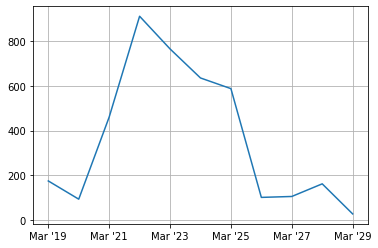

In [44]:
print("Predicted Share Price:")
print("   ")

profit_calc['Market_Price'].plot()
plt.grid()

Continuing graph of actuals and projections of Net Sales/Income from operations:-
   


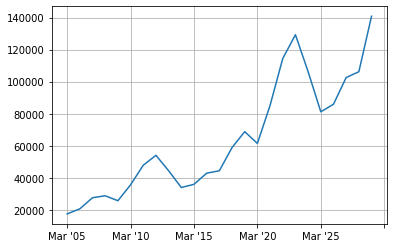

In [46]:
print('Continuing graph of actuals and projections of Net Sales/Income from operations:-')
print("   ")
pd.concat([data_tata.sort_index(axis=1, ascending=True).transpose()['Net Sales/Income from operations'],prediction_table[prediction_table["category"]=="Income"].T.iloc[1:11,:]['Net Sales/Income from operations']]).plot()
plt.grid()

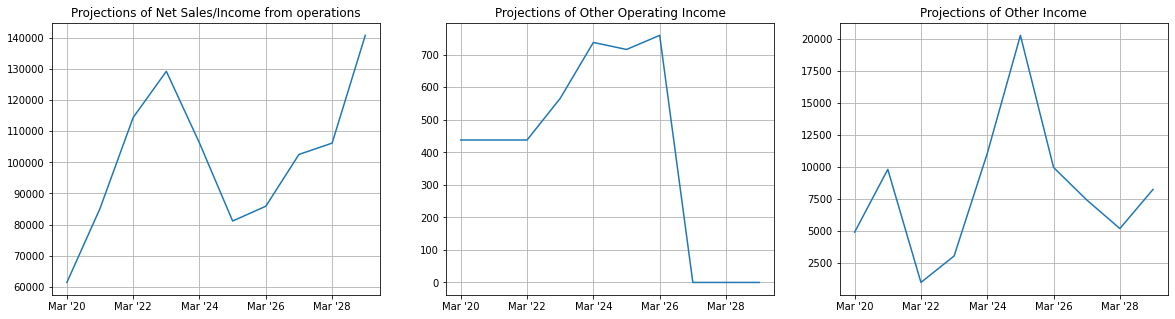

In [47]:

plt.figure(figsize = (20,5))

plt.subplot(1,3,1)
plt.title("Projections of Net Sales/Income from operations")
prediction_table[prediction_table["category"]=="Income"].T.iloc[1:11,:]['Net Sales/Income from operations'].plot()
plt.grid()

plt.subplot(1,3,2)
plt.title('Projections of Other Operating Income')
prediction_table[prediction_table["category"]=="Income"].T.iloc[1:11,:]['Other Operating Income'].plot()
plt.grid()

plt.subplot(1,3,3)
plt.title("Projections of Other Income")
prediction_table[prediction_table["category"]=="Income"].T.iloc[1:11,:]['Other Income'].plot()
plt.grid()

plt.show()

In [49]:
prediction_expenses = prediction_table[prediction_table["category"]=="Expense"].T.iloc[1:11,:].columns.tolist()
prediction_expenses

['Consumption of Raw Materials',
 'Purchase of Traded Goods',
 'Increase/Decrease in Stocks',
 'Power & Fuel',
 'Employees Cost',
 'Depreciation',
 'Excise Duty',
 'Admin. And Selling Expenses',
 'R & D Expenses',
 'Provisions And Contingencies',
 'Exp. Capitalised',
 'Other Expenses',
 'Interest',
 'Prior Year Adjustments',
 'Extra Ordinary Items']

In [45]:
prediction_table[prediction_table["category"]=="Expense"].T.iloc[1:11,:]

Yearly Results of Tata Motors (in Rs. Cr.),Consumption of Raw Materials,Purchase of Traded Goods,Increase/Decrease in Stocks,Power & Fuel,Employees Cost,Depreciation,Excise Duty,Admin. And Selling Expenses,R & D Expenses,Provisions And Contingencies,Exp. Capitalised,Other Expenses,Interest,Prior Year Adjustments,Extra Ordinary Items
Mar '20,38163.8,6722.32,850.84,0,4291.97,4154.29,0,0,0,0,-1093.11,13009.3,4279.11,0,0
Mar '21,47985.5,6722.32,-2168.31,0,5079.71,4911.15,0,0,0,0,-883.705,20226.2,7011.42,0,0
Mar '22,63670.9,6722.32,-1266.11,0,6346.48,6464.01,0,0,0,0,-975.758,14835.6,7266.45,0,0
Mar '23,79757.4,5874.01,-2229.83,0,7445.98,7632.43,0,0,0,0,-1082.5,16366.6,7740.48,0,0
Mar '24,64108.1,5354.07,-513.278,0,7848.65,8634.16,0,0,0,0,-1138.19,15532.4,8814.83,0,0
Mar '25,48221.5,4610.34,1328.66,0,7961.22,9834.46,0,0,0,0,-1204.2,14048.9,8495.72,0,0
Mar '26,52133.2,5263.49,-3141.22,0,8552.62,12366,0,0,0,0,-1335.03,16135.6,10237.1,0,0
Mar '27,58821,3744.98,35.9223,0,8822.38,11064.4,0,0,0,0,-1234.38,16779.6,10112.1,0,0
Mar '28,65073.2,3602.55,-898.701,0,9844.75,14105.4,0,0,0,0,-1123.58,16857.7,10100.4,0,0
Mar '29,87253.5,4347.94,3009.79,0,10974.1,14734.8,0,0,0,0,-1020.39,18425,11080.3,0,0


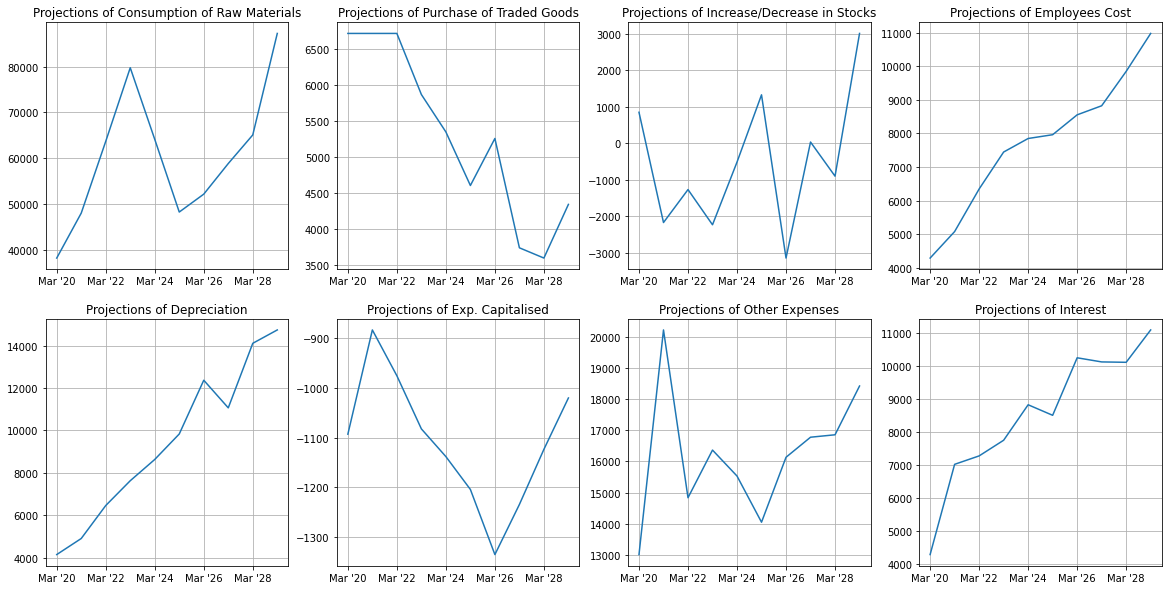

In [50]:
plt.figure(figsize = (20,10))

plt.subplot(2,4,1)
plt.title("Projections of "+str(prediction_expenses[0]))
prediction_table[prediction_table["category"]=="Expense"].T.iloc[1:11,:][prediction_expenses[0]].plot()
plt.grid()

plt.subplot(2,4,2)
plt.title("Projections of "+str(prediction_expenses[1]))
prediction_table[prediction_table["category"]=="Expense"].T.iloc[1:11,:][prediction_expenses[1]].plot()
plt.grid()

plt.subplot(2,4,3)
plt.title("Projections of "+str(prediction_expenses[2]))
prediction_table[prediction_table["category"]=="Expense"].T.iloc[1:11,:][prediction_expenses[2]].plot()
plt.grid()

plt.subplot(2,4,4)
plt.title("Projections of "+str(prediction_expenses[4]))
prediction_table[prediction_table["category"]=="Expense"].T.iloc[1:11,:][prediction_expenses[4]].plot()
plt.grid()

plt.subplot(2,4,5)
plt.title("Projections of "+str(prediction_expenses[5]))
prediction_table[prediction_table["category"]=="Expense"].T.iloc[1:11,:][prediction_expenses[5]].plot()
plt.grid()

plt.subplot(2,4,6)
plt.title("Projections of "+str(prediction_expenses[10]))
prediction_table[prediction_table["category"]=="Expense"].T.iloc[1:11,:][prediction_expenses[10]].plot()
plt.grid()

plt.subplot(2,4,7)
plt.title("Projections of "+str(prediction_expenses[11]))
prediction_table[prediction_table["category"]=="Expense"].T.iloc[1:11,:][prediction_expenses[11]].plot()
plt.grid()

plt.subplot(2,4,8)
plt.title("Projections of "+str(prediction_expenses[12]))
prediction_table[prediction_table["category"]=="Expense"].T.iloc[1:11,:][prediction_expenses[12]].plot()
plt.grid()

plt.show()

Comparitive graph of projected items scaled to 100 as first value
 


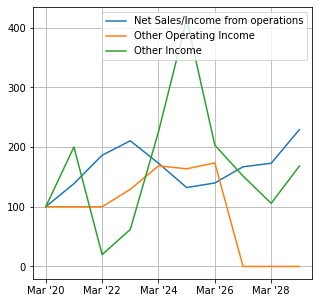

In [48]:

#Comparitive graph of projected items scaled to 100 as first value

print("Comparitive graph of projected items scaled to 100 as first value")
print(" ")
plt.figure(figsize = (5,5))
for i in ['Net Sales/Income from operations','Other Operating Income','Other Income']:
  (prediction_table[prediction_table["category"]=="Income"].T.iloc[1:11,:][i]/prediction_table[prediction_table["category"]=="Income"].T.iloc[1:11,:][i][0]*100).plot()
plt.legend()
plt.grid()
plt.show()